# Sparse Grids using TASMANIAN

In [7]:
##############################################################################################################################################################################
# Copyright (c) 2017, Miroslav Stoyanov
#
# This file is part of
# Toolkit for Adaptive Stochastic Modeling And Non-Intrusive ApproximatioN: TASMANIAN
#
# Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions
#    and the following disclaimer in the documentation and/or other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse
#    or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES,
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY,
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA,
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
#
# UT-BATTELLE, LLC AND THE UNITED STATES GOVERNMENT MAKE NO REPRESENTATIONS AND DISCLAIM ALL WARRANTIES, BOTH EXPRESSED AND IMPLIED.
# THERE ARE NO EXPRESS OR IMPLIED WARRANTIES OF MERCHANTABILITY OR FITNESS FOR A PARTICULAR PURPOSE, OR THAT THE USE OF THE SOFTWARE WILL NOT INFRINGE ANY PATENT,
# COPYRIGHT, TRADEMARK, OR OTHER PROPRIETARY RIGHTS, OR THAT THE SOFTWARE WILL ACCOMPLISH THE INTENDED RESULTS OR THAT THE SOFTWARE OR ITS USE WILL NOT RESULT IN INJURY OR DAMAGE.
# THE USER ASSUMES RESPONSIBILITY FOR ALL LIABILITIES, PENALTIES, FINES, CLAIMS, CAUSES OF ACTION, AND COSTS AND EXPENSES, CAUSED BY, RESULTING FROM OR ARISING OUT OF,
# IN WHOLE OR IN PART THE USE, STORAGE OR DISPOSAL OF THE SOFTWARE.
##############################################################################################################################################################################

- TASMANIAN
  - optimisation
  - sparse grid
    - integration
    - interpolation   

## 1. Integrate $f(x,y) = exp(-x^2) \cdot cos(y)$ using Clenshaw-Curtis nodes of type level

In [5]:
import numpy as np
import Tasmanian

def example_01():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 1:  integrate f(x,y) = exp(-x^2) * cos(y),")
    print("            using clenshaw-curtis nodes and grid of type level")

    iNumDimensions = 2
    iLevel = 5

    fExactIntegral = 2.513723354063905e+00 # the exact integral

    grid = Tasmanian.SparseGrid()
    grid.makeGlobalGrid(iNumDimensions, 0, iLevel, "level", "clenshaw-curtis")
    aPoints = grid.getPoints()
    aWeights = grid.getQuadratureWeights()

    fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))

    fError = np.abs(fApproximateIntegral - fExactIntegral)

    print("    at level: {0:1d}".format(iLevel))
    print("    the grid has: {0:1d}".format(grid.getNumPoints()))
    print("    integral: {0:1.14e}".format(fApproximateIntegral))
    print("       error: {0:1.14e}\n".format(fError))

    iLevel = 7

    grid.makeGlobalGrid(iNumDimensions, 0, iLevel, "level", "clenshaw-curtis")
    aPoints = grid.getPoints()
    aWeights = grid.getQuadratureWeights()

    fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))

    fError = np.abs(fApproximateIntegral - fExactIntegral)

    print("    at level: {0:1d}".format(iLevel))
    print("    the grid has: {0:1d}".format(grid.getNumPoints()))
    print("    integral: {0:1.14e}".format(fApproximateIntegral))
    print("       error: {0:1.14e}\n".format(fError))


if (__name__ == "__main__"):
    example_01()


---------------------------------------------------------------------------------------------------

Example 1:  integrate f(x,y) = exp(-x^2) * cos(y),
            using clenshaw-curtis nodes and grid of type level
    at level: 5
    the grid has: 145
    integral: 2.51372328921956e+00
       error: 6.48443414519306e-08

    at level: 7
    the grid has: 705
    integral: 2.51372335406391e+00
       error: 8.88178419700125e-16




---------------------------------------------------------------------------------------------------

Example 1:  integrate f(x,y) = exp(-x^2) * cos(y),
            using clenshaw-curtis nodes and grid of type level


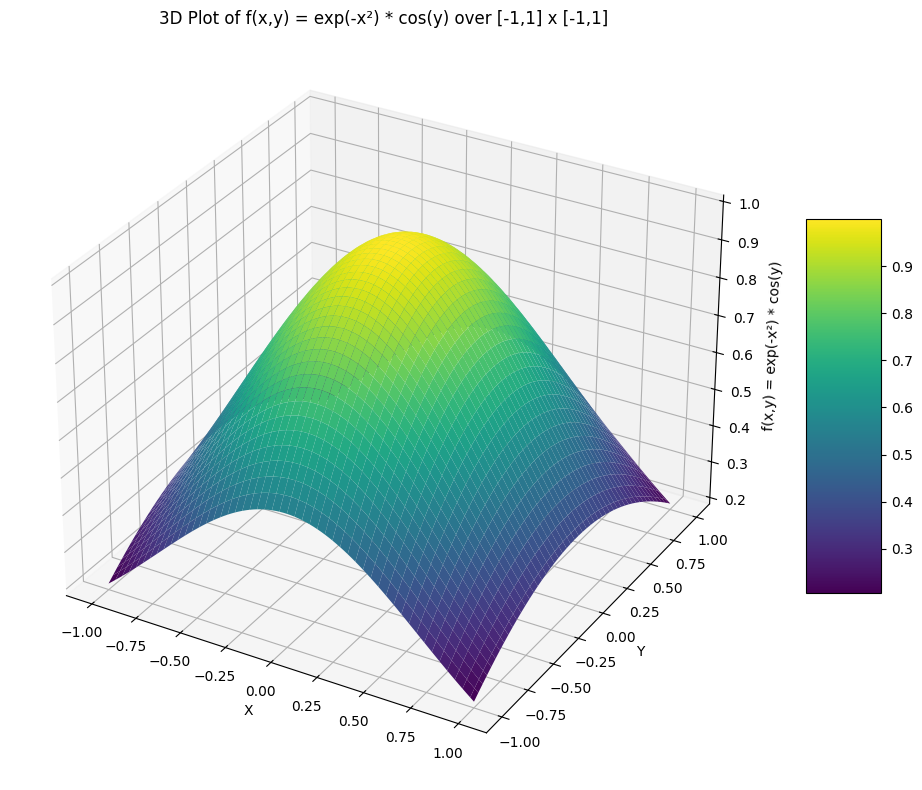

    at level: 5
    the grid has: 145
    integral: 2.51372328921956e+00
       error: 6.48443414519306e-08



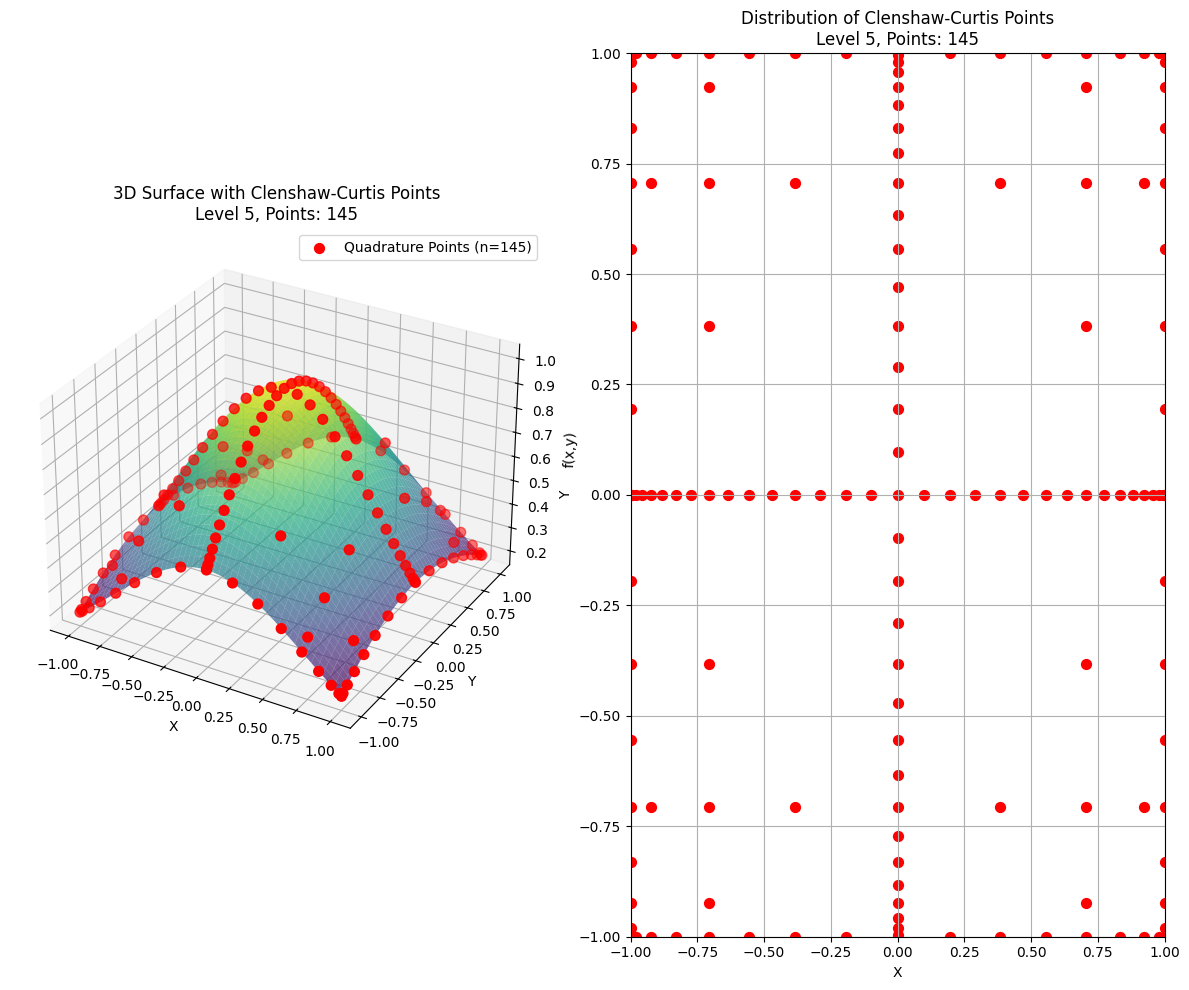

    at level: 7
    the grid has: 705
    integral: 2.51372335406391e+00
       error: 8.88178419700125e-16



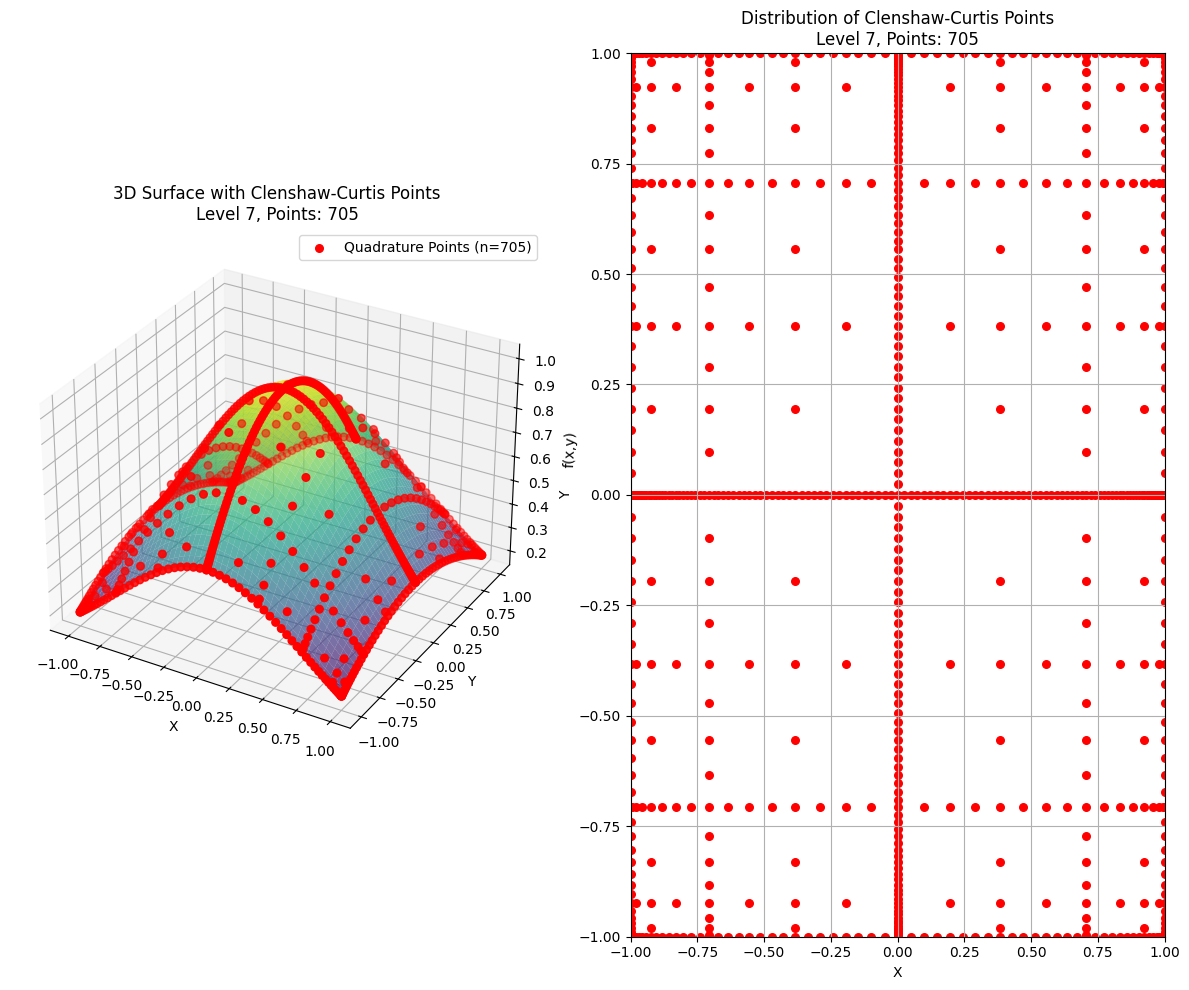

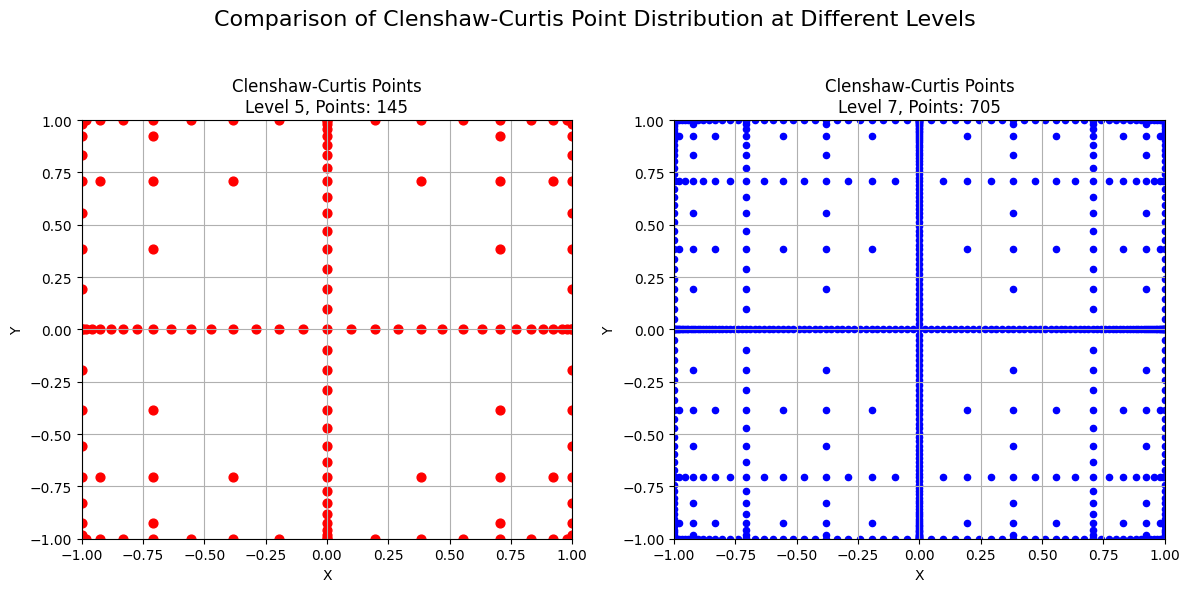

In [8]:
import numpy as np
import Tasmanian
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def example_01():
    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 1:  integrate f(x,y) = exp(-x^2) * cos(y),")
    print("            using clenshaw-curtis nodes and grid of type level")
    
    # Define the domain for plotting (default in Tasmanian is [-1,1] for each dimension)
    x_range = [-1, 1]
    y_range = [-1, 1]
    
    # Plot the function f(x,y) = exp(-x^2) * cos(y)
    # Create a mesh grid for plotting
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-X**2) * np.cos(Y)
    
    # Create 3D plot of the function
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True)
    
    # Add a color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x,y) = exp(-x²) * cos(y)')
    ax.set_title('3D Plot of f(x,y) = exp(-x²) * cos(y) over [-1,1] x [-1,1]')
    
    # Show plot
    plt.tight_layout()
    plt.show()
    
    # Original integration code - Level 5
    iNumDimensions = 2
    iLevel = 5
    fExactIntegral = 2.513723354063905e+00 # the exact integral
    grid = Tasmanian.SparseGrid()
    grid.makeGlobalGrid(iNumDimensions, 0, iLevel, "level", "clenshaw-curtis")
    aPoints = grid.getPoints()
    aWeights = grid.getQuadratureWeights()
    fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))
    fError = np.abs(fApproximateIntegral - fExactIntegral)
    print("    at level: {0:1d}".format(iLevel))
    print("    the grid has: {0:1d}".format(grid.getNumPoints()))
    print("    integral: {0:1.14e}".format(fApproximateIntegral))
    print("       error: {0:1.14e}\n".format(fError))
    
    # Plot integration points for Level 5
    fig = plt.figure(figsize=(12, 10))
    
    # First subplot - 3D surface with quadrature points
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.7)
    
    # Plot the quadrature points
    point_values = np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1])
    scatter = ax1.scatter(aPoints[:,0], aPoints[:,1], point_values, 
                         c='red', s=50, marker='o', label=f'Quadrature Points (n={grid.getNumPoints()})')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title(f'3D Surface with Clenshaw-Curtis Points\nLevel {iLevel}, Points: {grid.getNumPoints()}')
    ax1.legend()
    
    # Second subplot - 2D distribution of points
    ax2 = fig.add_subplot(122)
    ax2.scatter(aPoints[:,0], aPoints[:,1], c='red', s=50, marker='o')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_xlim(x_range)
    ax2.set_ylim(y_range)
    ax2.set_title(f'Distribution of Clenshaw-Curtis Points\nLevel {iLevel}, Points: {grid.getNumPoints()}')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Level 7
    iLevel = 7
    grid.makeGlobalGrid(iNumDimensions, 0, iLevel, "level", "clenshaw-curtis")
    aPoints = grid.getPoints()
    aWeights = grid.getQuadratureWeights()
    fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))
    fError = np.abs(fApproximateIntegral - fExactIntegral)
    print("    at level: {0:1d}".format(iLevel))
    print("    the grid has: {0:1d}".format(grid.getNumPoints()))
    print("    integral: {0:1.14e}".format(fApproximateIntegral))
    print("       error: {0:1.14e}\n".format(fError))
    
    # Plot integration points for Level 7
    fig = plt.figure(figsize=(12, 10))
    
    # First subplot - 3D surface with quadrature points
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.7)
    
    # Plot the quadrature points
    point_values = np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1])
    scatter = ax1.scatter(aPoints[:,0], aPoints[:,1], point_values, 
                         c='red', s=30, marker='o', label=f'Quadrature Points (n={grid.getNumPoints()})')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title(f'3D Surface with Clenshaw-Curtis Points\nLevel {iLevel}, Points: {grid.getNumPoints()}')
    ax1.legend()
    
    # Second subplot - 2D distribution of points
    ax2 = fig.add_subplot(122)
    ax2.scatter(aPoints[:,0], aPoints[:,1], c='red', s=30, marker='o')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_xlim(x_range)
    ax2.set_ylim(y_range)
    ax2.set_title(f'Distribution of Clenshaw-Curtis Points\nLevel {iLevel}, Points: {grid.getNumPoints()}')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Compare both levels side by side (2D view)
    fig = plt.figure(figsize=(12, 6))
    
    # Store the previous level points
    grid.makeGlobalGrid(iNumDimensions, 0, 5, "level", "clenshaw-curtis")
    aPointsLevel5 = grid.getPoints()
    
    # Get the level 7 points again
    grid.makeGlobalGrid(iNumDimensions, 0, 7, "level", "clenshaw-curtis")
    aPointsLevel7 = grid.getPoints()
    
    # Level 5 plot
    ax1 = fig.add_subplot(121)
    ax1.scatter(aPointsLevel5[:,0], aPointsLevel5[:,1], c='red', s=40, marker='o')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_xlim(x_range)
    ax1.set_ylim(y_range)
    ax1.set_title(f'Clenshaw-Curtis Points\nLevel 5, Points: {len(aPointsLevel5)}')
    ax1.grid(True)
    
    # Level 7 plot
    ax2 = fig.add_subplot(122)
    ax2.scatter(aPointsLevel7[:,0], aPointsLevel7[:,1], c='blue', s=20, marker='o')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_xlim(x_range)
    ax2.set_ylim(y_range)
    ax2.set_title(f'Clenshaw-Curtis Points\nLevel 7, Points: {len(aPointsLevel7)}')
    ax2.grid(True)
    
    plt.suptitle('Comparison of Clenshaw-Curtis Point Distribution at Different Levels', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

if (__name__ == "__main__"):
    example_01()

## 2. Integrate $f(x,y) = exp(-x^2) \cdot cos(y)$ over $[-5,5] \times [-2,3]$ using  Gauss-Patterson nodes and total degree polynomial space

In [6]:
import numpy as np
import Tasmanian

def example_02():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 2: integrate f(x,y) = exp(-x^2) * cos(y) over [-5,5] x [-2,3]")
    print("           using  Gauss-Patterson nodes and total degree polynomial space)")

    iNumDimensions = 2
    iExactness = 20

    fExactIntegral = 1.861816427518323e+00

    # the type_qptotal will guarantee exact integral for all polynomials with degree 20 or less
    grid = Tasmanian.makeGlobalGrid(iNumDimensions, 0, iExactness, "qptotal", "gauss-patterson")
    grid.setDomainTransform(np.array([[-5.0, 5.0], [-2.0, 3.0]])) # set the non-canonical domain

    aPoints = grid.getPoints()
    aWeights = grid.getQuadratureWeights()

    fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))

    fError = np.abs(fApproximateIntegral - fExactIntegral)

    print("    at polynomial exactness".format(iExactness))
    print("    the grid has: {0:1d}".format(grid.getNumPoints()))
    print("    integral: {0:1.14e}".format(fApproximateIntegral))
    print("       error: {0:1.14e}\n".format(fError))

    iExactness = 40

    # the type_qptotal will guarantee exact integral for all polynomials with degree 20 or less
    grid = Tasmanian.makeGlobalGrid(iNumDimensions, 0, iExactness, "qptotal", "gauss-patterson")
    grid.setDomainTransform(np.array([[-5.0, 5.0], [-2.0, 3.0]])) # must reset the domain

    aPoints = grid.getPoints()
    aWeights = grid.getQuadratureWeights()

    fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))

    fError = np.abs(fApproximateIntegral - fExactIntegral)

    print("    at polynomial exactness".format(iExactness))
    print("    the grid has: {0:1d}".format(grid.getNumPoints()))
    print("    integral: {0:1.14e}".format(fApproximateIntegral))
    print("       error: {0:1.14e}\n".format(fError))


if (__name__ == "__main__"):
    example_02()


---------------------------------------------------------------------------------------------------

Example 2: integrate f(x,y) = exp(-x^2) * cos(y) over [-5,5] x [-2,3]
           using  Gauss-Patterson nodes and total degree polynomial space)
    at polynomial exactness
    the grid has: 161
    integral: 1.86459164652247e+00
       error: 2.77521900414479e-03

    at polynomial exactness
    the grid has: 705
    integral: 1.86181642759028e+00
       error: 7.19606596533140e-11




---------------------------------------------------------------------------------------------------

Example 2: integrate f(x,y) = exp(-x^2) * cos(y) over [-5,5] x [-2,3]
           using  Gauss-Patterson nodes and total degree polynomial space)


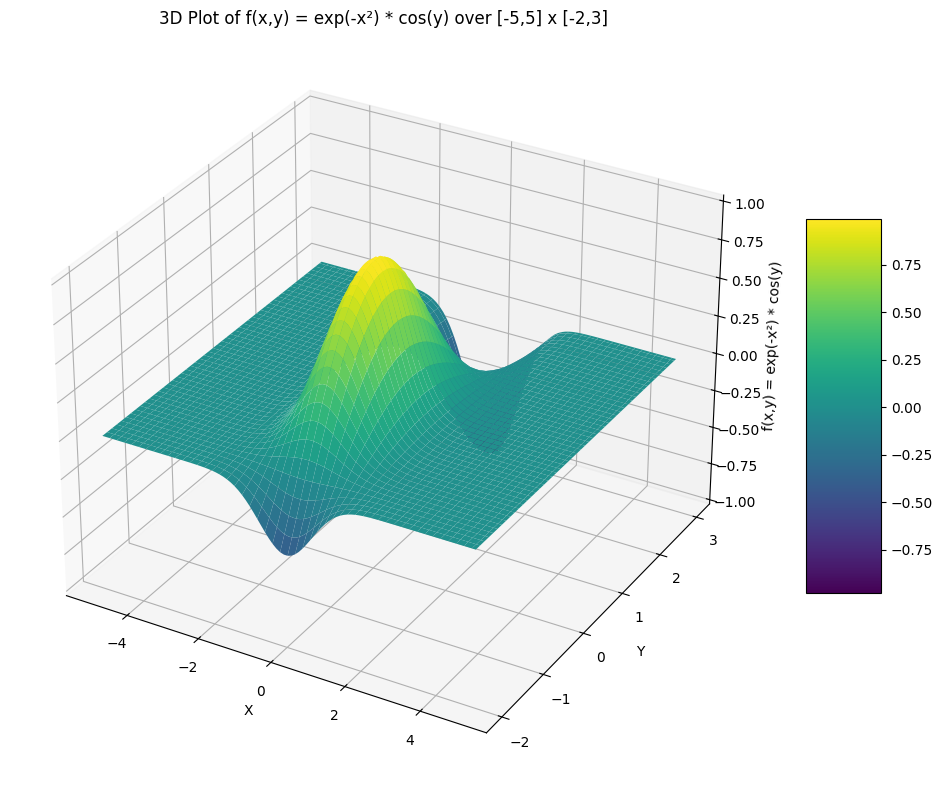

    at polynomial exactness
    the grid has: 161
    integral: 1.86459164652247e+00
       error: 2.77521900414479e-03



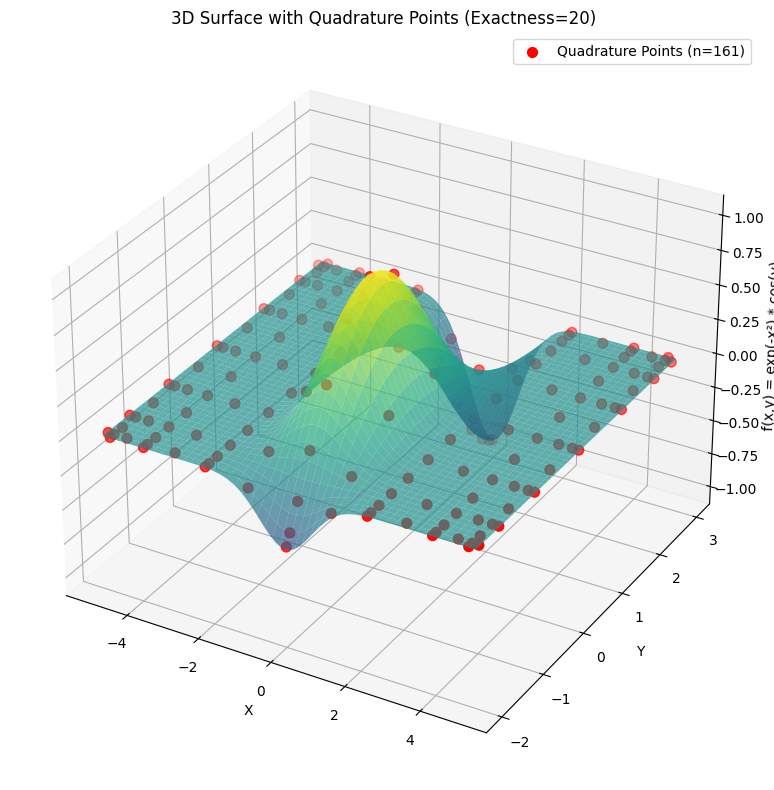

    at polynomial exactness
    the grid has: 705
    integral: 1.86181642759028e+00
       error: 7.19606596533140e-11



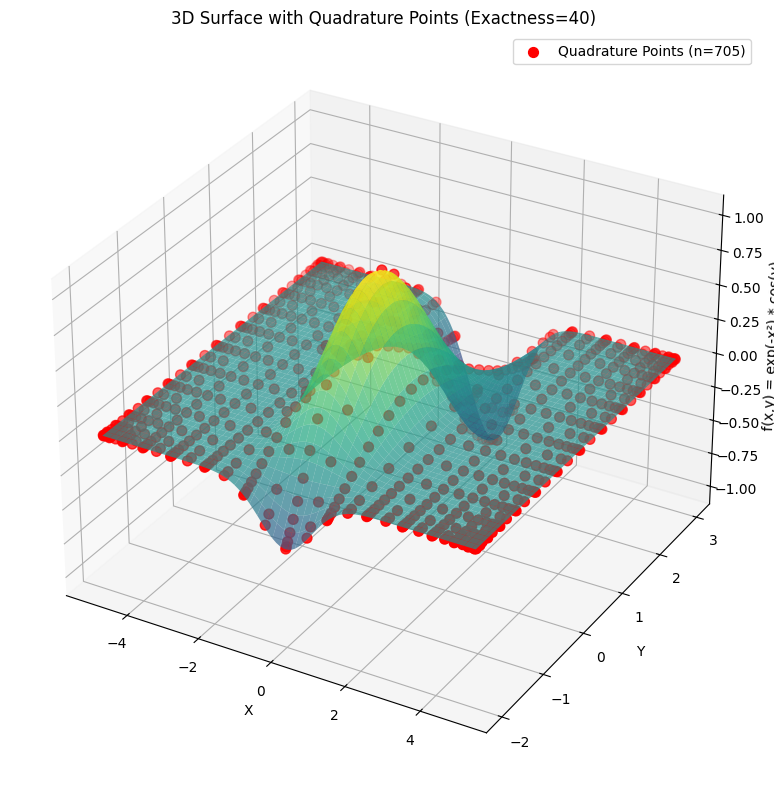

In [7]:
# Plot 3D graph
import numpy as np
import Tasmanian
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def example_02():
    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 2: integrate f(x,y) = exp(-x^2) * cos(y) over [-5,5] x [-2,3]")
    print("           using  Gauss-Patterson nodes and total degree polynomial space)")
    
    # Plot the function f(x,y) = exp(-x^2) * cos(y)
    # Create a mesh grid for plotting
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-2, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-X**2) * np.cos(Y)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True)
    
    # Add a color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x,y) = exp(-x²) * cos(y)')
    ax.set_title('3D Plot of f(x,y) = exp(-x²) * cos(y) over [-5,5] x [-2,3]')
    
    # Show plot
    plt.tight_layout()
    plt.show()
    
    # Original integration code follows
    iNumDimensions = 2
    iExactness = 20
    fExactIntegral = 1.861816427518323e+00
    # the type_qptotal will guarantee exact integral for all polynomials with degree 20 or less
    grid = Tasmanian.makeGlobalGrid(iNumDimensions, 0, iExactness, "qptotal", "gauss-patterson")
    grid.setDomainTransform(np.array([[-5.0, 5.0], [-2.0, 3.0]])) # set the non-canonical domain
    aPoints = grid.getPoints()
    aWeights = grid.getQuadratureWeights()
    fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))
    fError = np.abs(fApproximateIntegral - fExactIntegral)
    print("    at polynomial exactness".format(iExactness))
    print("    the grid has: {0:1d}".format(grid.getNumPoints()))
    print("    integral: {0:1.14e}".format(fApproximateIntegral))
    print("       error: {0:1.14e}\n".format(fError))
    
    # Plot integration points used for the first grid
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface again as reference
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.7)
    
    # Plot the quadrature points
    point_values = np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1])
    scatter = ax.scatter(aPoints[:,0], aPoints[:,1], point_values, 
                         c='red', s=50, marker='o', label=f'Quadrature Points (n={grid.getNumPoints()})')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x,y) = exp(-x²) * cos(y)')
    ax.set_title(f'3D Surface with Quadrature Points (Exactness={iExactness})')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    iExactness = 40
    # the type_qptotal will guarantee exact integral for all polynomials with degree 20 or less
    grid = Tasmanian.makeGlobalGrid(iNumDimensions, 0, iExactness, "qptotal", "gauss-patterson")
    grid.setDomainTransform(np.array([[-5.0, 5.0], [-2.0, 3.0]])) # must reset the domain
    aPoints = grid.getPoints()
    aWeights = grid.getQuadratureWeights()
    fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1]))
    fError = np.abs(fApproximateIntegral - fExactIntegral)
    print("    at polynomial exactness".format(iExactness))
    print("    the grid has: {0:1d}".format(grid.getNumPoints()))
    print("    integral: {0:1.14e}".format(fApproximateIntegral))
    print("       error: {0:1.14e}\n".format(fError))
    
    # Plot integration points used for the second grid
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface again
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.7)
    
    # Plot the quadrature points
    point_values = np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1])
    scatter = ax.scatter(aPoints[:,0], aPoints[:,1], point_values, 
                         c='red', s=50, marker='o', label=f'Quadrature Points (n={grid.getNumPoints()})')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x,y) = exp(-x²) * cos(y)')
    ax.set_title(f'3D Surface with Quadrature Points (Exactness={iExactness})')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

if (__name__ == "__main__"):
    example_02()

## 3. Integrate  $exp(-x_1^2 - x_2^2) \cdot cos(x_3) \cdot cos(x_4)$ for  $x_1$, $x_2$ $\in$ $[-5,5]$;  $x_3$, $x_4$ $\in$ $[-2,3]$ <br> using different rules and total degree polynomial space

In [6]:
import numpy as np
import Tasmanian

def example_03():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 3: integrate exp(-x1^2 - x2^2) * cos(x3) * cos(x4)")
    print("           for x1, x2 in [-5,5]; x3, x4 in [-2,3]")
    print("           using different rules and total degree polynomial space\n")

    def make_grid(iPrecision, sRule):
        grid = Tasmanian.makeGlobalGrid(4, 0, iPrecision, "qptotal", sRule)
        grid.setDomainTransform(np.array([[-5.0, 5.0], [-5.0, 5.0], [-2.0, 3.0], [-2.0, 3.0]]))
        return grid

    def print_error(grid):
        fExactIntegral = 1.861816427518323e+00 * 1.861816427518323e+00
        aPoints = grid.getPoints()
        aWeights = grid.getQuadratureWeights()

        fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2 -aPoints[:,1]**2)
                                      * np.cos(aPoints[:,2]) * np.cos(aPoints[:,3]))
        fError = np.abs(fApproximateIntegral - fExactIntegral)
        return "{0:>10d}{1:>10.2e}".format(grid.getNumPoints(), fError)

    print("               Clenshaw-Curtis      Gauss-Legendre    Gauss-Patterson")
    print(" precision    points     error    points     error    points    error")

    for prec in range(5, 41, 5):
        print("{0:>10d}{1:1s}{2:1s}{3:1s}".format(
            prec,
            print_error(make_grid(prec, "clenshaw-curtis")),
            print_error(make_grid(prec, "gauss-legendre-odd")),
            print_error(make_grid(prec, "gauss-patterson"))))

    print("\nAt 311K points the Gauss-Legendre error is O(1.E-1),")
    print("                   Clenshaw-Curtis error is O(1.E-7) at 320K points.")
    print("At 70K points the Gauss-Patterson error is O(1.E-4),")
    print("                  Clenshaw-Curtis needs 158K points to achieve the same.")


if (__name__ == "__main__"):
    example_03()


---------------------------------------------------------------------------------------------------

Example 3: integrate exp(-x1^2 - x2^2) * cos(x3) * cos(x4)
           for x1, x2 in [-5,5]; x3, x4 in [-2,3]
           using different rules and total degree polynomial space

               Clenshaw-Curtis      Gauss-Legendre    Gauss-Patterson
 precision    points     error    points     error    points    error
         5        41  8.57e+02        33  1.79e+03        33  1.79e+03
        10       849  8.48e+01       409  4.66e+02       385  2.72e+02
        15      3377  3.12e+01      1481  2.23e+02      1217  1.59e+02
        20     15361  3.94e+00      7129  5.96e+01      4929  2.55e+01
        25     34177  3.49e-01     17817  1.96e+01      8705  3.40e+00
        30     91777  1.97e-03     55345  3.57e+00     22401  1.66e-01
        35    158465  1.27e-04    110521  1.05e+00     34689  2.52e-03
        40    320257  3.84e-07    311697  1.04e-01     70017  1.46e-04

At 311K poin


---------------------------------------------------------------------------------------------------

Example 3: integrate exp(-x1^2 - x2^2) * cos(x3) * cos(x4)
           for x1, x2 in [-5,5]; x3, x4 in [-2,3]
           using different rules and total degree polynomial space

               Clenshaw-Curtis      Gauss-Legendre    Gauss-Patterson
 precision    points     error    points     error    points    error
         5        41  8.57e+02        33  1.79e+03        33  1.79e+03
        10       849  8.48e+01       409  4.66e+02       385  2.72e+02
        15      3377  3.12e+01      1481  2.23e+02      1217  1.59e+02
        20     15361  3.94e+00      7129  5.96e+01      4929  2.55e+01
        25     34177  3.49e-01     17817  1.96e+01      8705  3.40e+00
        30     91777  1.97e-03     55345  3.57e+00     22401  1.66e-01
        35    158465  1.27e-04    110521  1.05e+00     34689  2.52e-03
        40    320257  3.84e-07    311697  1.04e-01     70017  1.46e-04

At 311K poin

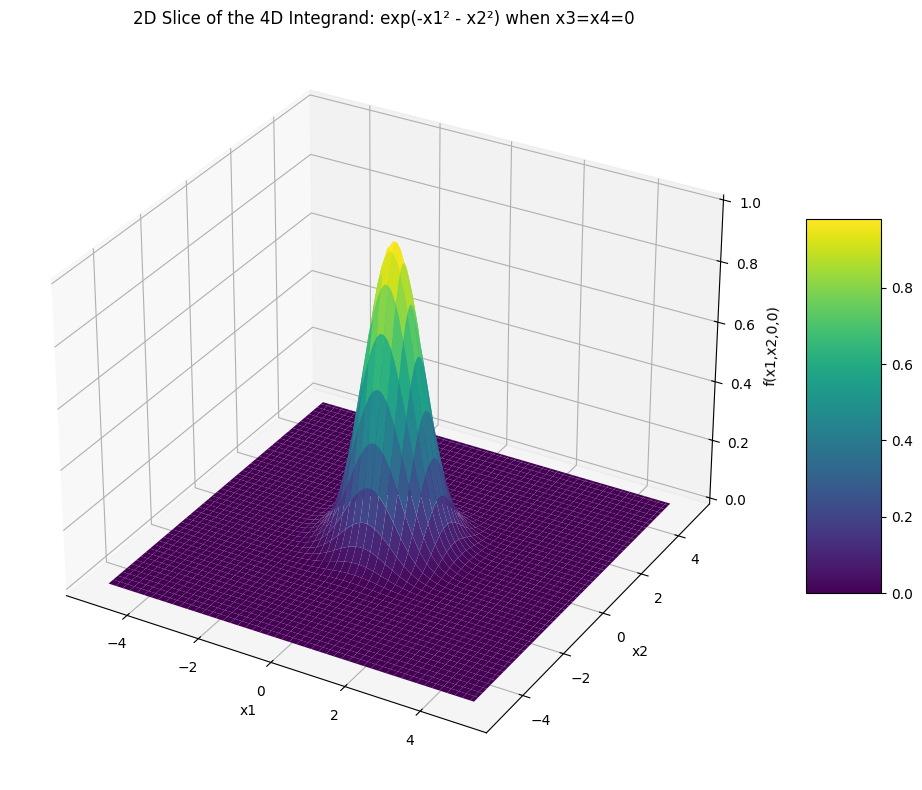

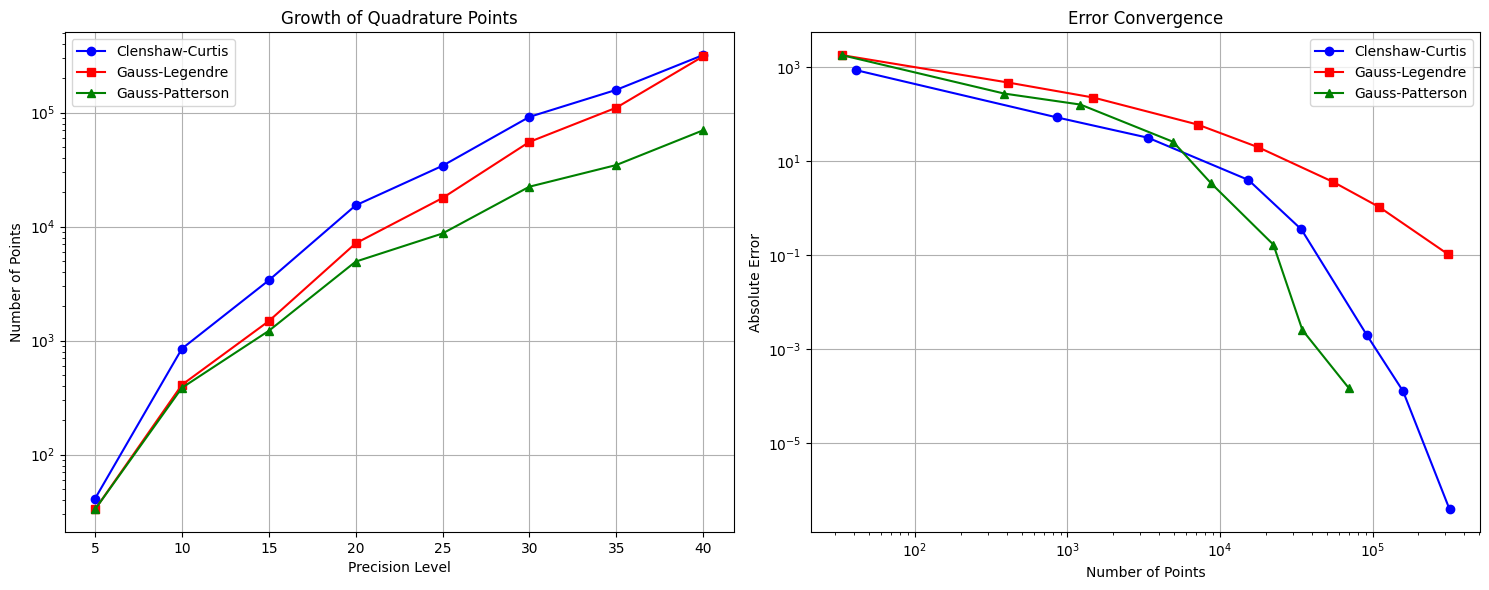

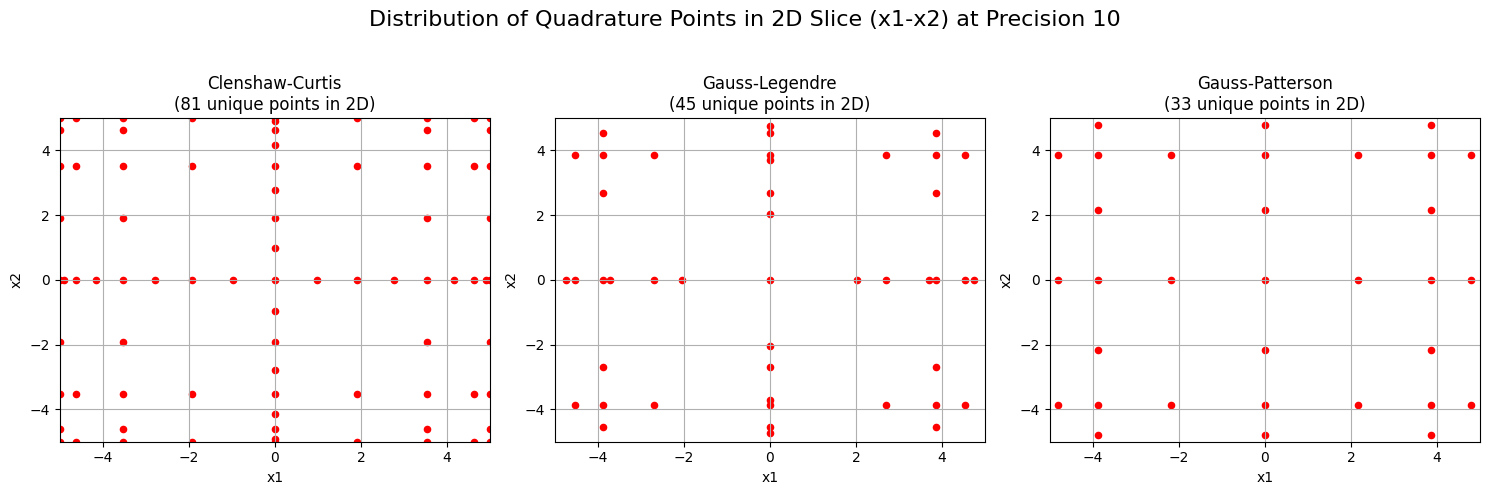

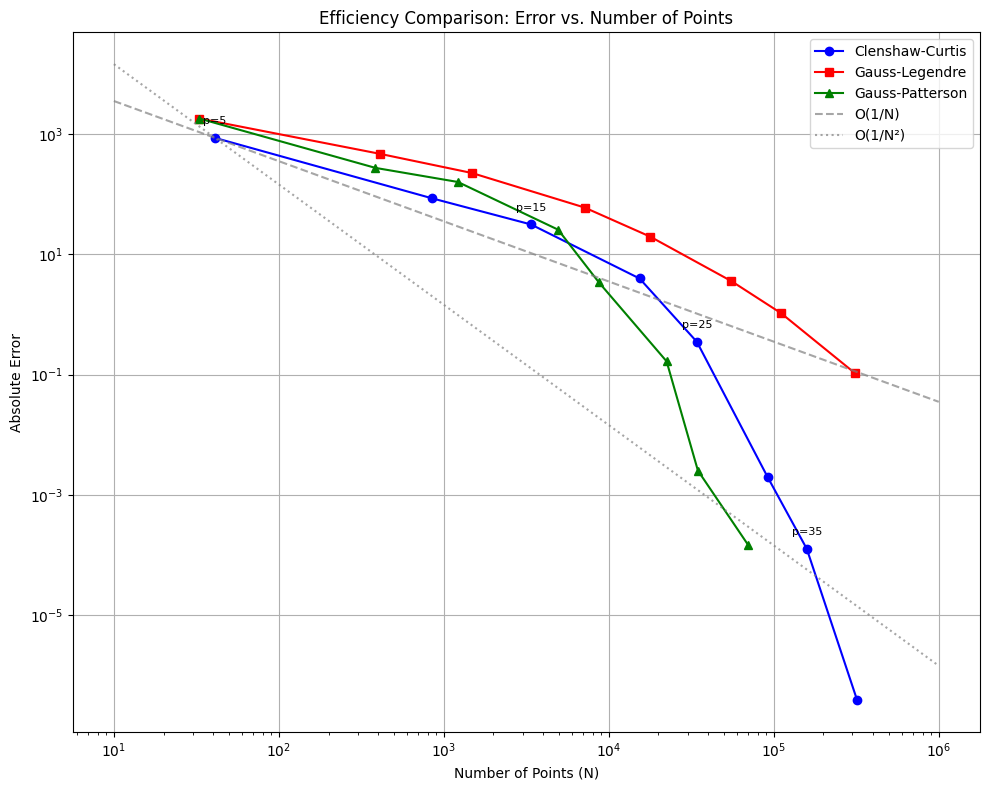

In [10]:
import numpy as np
import Tasmanian
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def example_03():
    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 3: integrate exp(-x1^2 - x2^2) * cos(x3) * cos(x4)")
    print("           for x1, x2 in [-5,5]; x3, x4 in [-2,3]")
    print("           using different rules and total degree polynomial space\n")
    
    # Store results for visualization
    precision_levels = list(range(5, 41, 5))
    cc_points = []
    cc_errors = []
    gl_points = []
    gl_errors = []
    gp_points = []
    gp_errors = []
    
    def make_grid(iPrecision, sRule):
        grid = Tasmanian.makeGlobalGrid(4, 0, iPrecision, "qptotal", sRule)
        grid.setDomainTransform(np.array([[-5.0, 5.0], [-5.0, 5.0], [-2.0, 3.0], [-2.0, 3.0]]))
        return grid
    
    def print_error(grid):
        fExactIntegral = 1.861816427518323e+00 * 1.861816427518323e+00
        aPoints = grid.getPoints()
        aWeights = grid.getQuadratureWeights()
        fApproximateIntegral = np.sum(aWeights * np.exp(-aPoints[:,0]**2 -aPoints[:,1]**2)
                                     * np.cos(aPoints[:,2]) * np.cos(aPoints[:,3]))
        fError = np.abs(fApproximateIntegral - fExactIntegral)
        return grid.getNumPoints(), fError, "{0:>10d}{1:>10.2e}".format(grid.getNumPoints(), fError)
    
    print("               Clenshaw-Curtis      Gauss-Legendre    Gauss-Patterson")
    print(" precision    points     error    points     error    points    error")
    
    for prec in precision_levels:
        # Get data for each method
        cc_grid = make_grid(prec, "clenshaw-curtis")
        cc_result = print_error(cc_grid)
        cc_points.append(cc_result[0])
        cc_errors.append(cc_result[1])
        
        gl_grid = make_grid(prec, "gauss-legendre-odd")
        gl_result = print_error(gl_grid)
        gl_points.append(gl_result[0])
        gl_errors.append(gl_result[1])
        
        gp_grid = make_grid(prec, "gauss-patterson")
        gp_result = print_error(gp_grid)
        gp_points.append(gp_result[0])
        gp_errors.append(gp_result[1])
        
        print("{0:>10d}{1:1s}{2:1s}{3:1s}".format(
            prec, 
            cc_result[2], 
            gl_result[2], 
            gp_result[2]))
    
    print("\nAt 311K points the Gauss-Legendre error is O(1.E-1),")
    print("                   Clenshaw-Curtis error is O(1.E-7) at 320K points.")
    print("At 70K points the Gauss-Patterson error is O(1.E-4),")
    print("                  Clenshaw-Curtis needs 158K points to achieve the same.")
    
    # Create visualization of a 2D slice of the 4D function
    # We'll fix x3=0 and x4=0 and visualize exp(-x1^2 - x2^2) * cos(0) * cos(0) = exp(-x1^2 - x2^2)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a mesh grid for the x1-x2 plane
    x1 = np.linspace(-5, 5, 100)
    x2 = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.exp(-X1**2 - X2**2)  # This is a 2D slice when x3=x4=0
    
    surf = ax.plot_surface(X1, X2, Z, cmap=cm.viridis, linewidth=0, antialiased=True)
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2,0,0)')
    ax.set_title('2D Slice of the 4D Integrand: exp(-x1² - x2²) when x3=x4=0')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    plt.tight_layout()
    plt.show()
    
    # Visualize the point growth and error convergence
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot the number of points vs precision level
    ax1.plot(precision_levels, cc_points, 'o-', color='blue', label='Clenshaw-Curtis')
    ax1.plot(precision_levels, gl_points, 's-', color='red', label='Gauss-Legendre')
    ax1.plot(precision_levels, gp_points, '^-', color='green', label='Gauss-Patterson')
    
    ax1.set_xlabel('Precision Level')
    ax1.set_ylabel('Number of Points')
    ax1.set_title('Growth of Quadrature Points')
    ax1.legend()
    ax1.grid(True)
    ax1.set_yscale('log')
    
    # Plot the error vs number of points
    ax2.loglog(cc_points, cc_errors, 'o-', color='blue', label='Clenshaw-Curtis')
    ax2.loglog(gl_points, gl_errors, 's-', color='red', label='Gauss-Legendre')
    ax2.loglog(gp_points, gp_errors, '^-', color='green', label='Gauss-Patterson')
    
    ax2.set_xlabel('Number of Points')
    ax2.set_ylabel('Absolute Error')
    ax2.set_title('Error Convergence')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Create a visualization of the distribution of quadrature points for a 2D slice
    # We'll take the first two dimensions (x1, x2) for one specific precision level
    precision_for_visual = 10  # Choose a moderate level for clarity
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Distribution of Quadrature Points in 2D Slice (x1-x2) at Precision {precision_for_visual}', fontsize=16)
    
    # Get points for each method at the chosen precision
    methods = ["clenshaw-curtis", "gauss-legendre-odd", "gauss-patterson"]
    titles = ["Clenshaw-Curtis", "Gauss-Legendre", "Gauss-Patterson"]
    
    for i, (method, title) in enumerate(zip(methods, titles)):
        grid = make_grid(precision_for_visual, method)
        points = grid.getPoints()
        
        # Extract the first two dimensions only
        x1_points = points[:, 0]
        x2_points = points[:, 1]
        
        # Create a set of unique (x1, x2) points to see the 2D distribution
        unique_points = set()
        for j in range(len(x1_points)):
            unique_points.add((x1_points[j], x2_points[j]))
        
        # Convert back to arrays for plotting
        unique_x1 = [p[0] for p in unique_points]
        unique_x2 = [p[1] for p in unique_points]
        
        # Plot the points
        axes[i].scatter(unique_x1, unique_x2, color='red', s=20)
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        axes[i].set_xlim(-5, 5)
        axes[i].set_ylim(-5, 5)
        axes[i].set_title(f'{title}\n({len(unique_points)} unique points in 2D)')
        axes[i].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Create a visualization comparing efficiency (error vs. points)
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.loglog(cc_points, cc_errors, 'o-', color='blue', label='Clenshaw-Curtis')
    ax.loglog(gl_points, gl_errors, 's-', color='red', label='Gauss-Legendre')
    ax.loglog(gp_points, gp_errors, '^-', color='green', label='Gauss-Patterson')
    
    # Add annotations for specific points of interest
    for i, prec in enumerate(precision_levels):
        if i % 2 == 0:  # Label every other precision level for clarity
            ax.annotate(f"p={prec}", 
                      (cc_points[i], cc_errors[i]), 
                      textcoords="offset points",
                      xytext=(0,10), 
                      ha='center',
                      fontsize=8)
    
    # Add reference lines
    x_range = np.logspace(1, 6, 100)
    
    # O(1/N) reference line (adjust position as needed)
    ref_factor = cc_errors[0] * cc_points[0]
    ax.loglog(x_range, ref_factor / x_range, '--', color='gray', alpha=0.7, label='O(1/N)')
    
    # O(1/N²) reference line
    ref_factor2 = cc_errors[0] * cc_points[0]**2
    ax.loglog(x_range, ref_factor2 / x_range**2, ':', color='gray', alpha=0.7, label='O(1/N²)')
    
    ax.set_xlabel('Number of Points (N)')
    ax.set_ylabel('Absolute Error')
    ax.set_title('Efficiency Comparison: Error vs. Number of Points')
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

if (__name__ == "__main__"):
    example_03()

## 4. Interpolate $f(x,y) = exp(-x^2) \cdot cos(y)$, using Clenshaw-Curtis iptotal rule

In [9]:
import numpy as np
import Tasmanian

def example_04():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 4: interpolate f(x,y) = exp(-x^2) * cos(y), using clenshaw-curtis iptotal rule")

    iNumInputs = 2
    iNumOutputs = 1

    aPointOfInterest = np.array([0.3, 0.7])
    aReferenceSolution = np.exp(-aPointOfInterest[0]**2) * np.cos(aPointOfInterest[1])

    for prec in [6, 12]:
        grid = Tasmanian.makeGlobalGrid(iNumInputs, iNumOutputs, prec,
                                        "iptotal", "clenshaw-curtis")
        aPoints = grid.getNeededPoints()

        aModelValues = np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1])
        grid.loadNeededValues(aModelValues.reshape((aModelValues.shape[0], iNumOutputs)))

        # when using multiple points at once, evaluateBatch() is more efficient
        aResult = grid.evaluate(aPointOfInterest)
        fError = np.abs(aResult[0] - aReferenceSolution)

        print("\n    using total degree polynomials: {0:>2d}th degree".format(prec))
        print("                      the grid has: {0:1d} points".format(grid.getNumPoints()))
        print("          interpolant at (0.3,0.7): {0:1.5e}".format(aResult[0]))
        print("                             error: {0:1.5e}".format(fError))


if (__name__ == "__main__"):
    example_04()


---------------------------------------------------------------------------------------------------

Example 4: interpolate f(x,y) = exp(-x^2) * cos(y), using clenshaw-curtis iptotal rule

    using total degree polynomials:  6th degree
                      the grid has: 49 points
          interpolant at (0.3,0.7): 6.98981e-01
                             error: 3.17814e-05

    using total degree polynomials: 12th degree
                      the grid has: 161 points
          interpolant at (0.3,0.7): 6.99013e-01
                             error: 3.77410e-11



---------------------------------------------------------------------------------------------------

Example 4: interpolate f(x,y) = exp(-x^2) * cos(y), using clenshaw-curtis iptotal rule


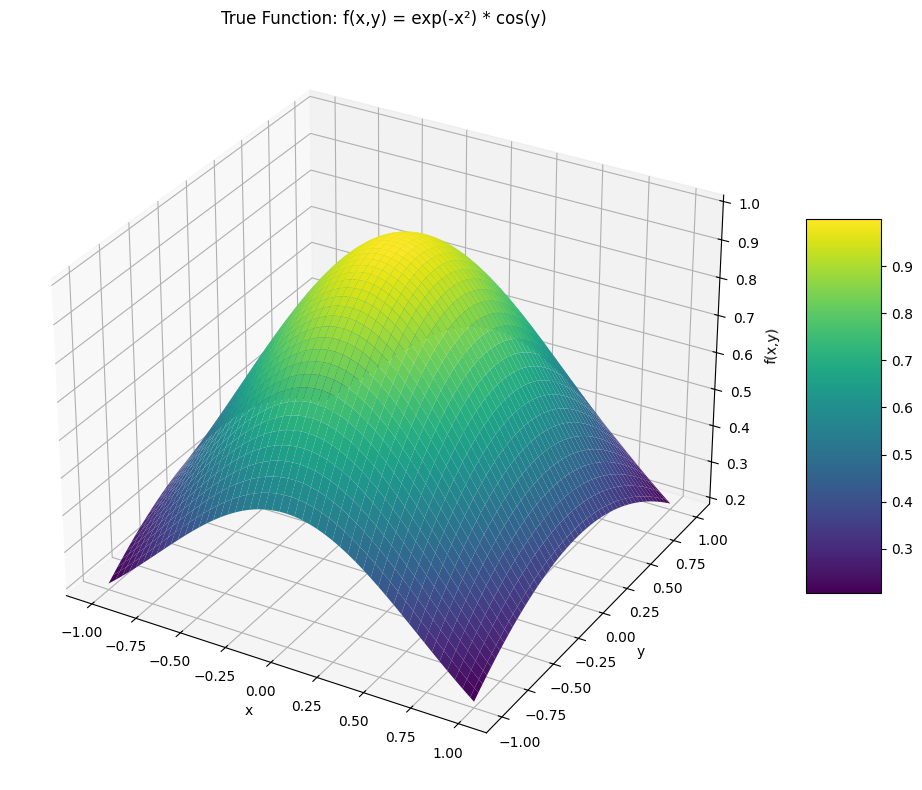


    using total degree polynomials:  6th degree
                      the grid has: 49 points
          interpolant at (0.3,0.7): 6.98981e-01
                             error: 3.17814e-05

    using total degree polynomials: 12th degree
                      the grid has: 161 points
          interpolant at (0.3,0.7): 6.99013e-01
                             error: 3.77410e-11


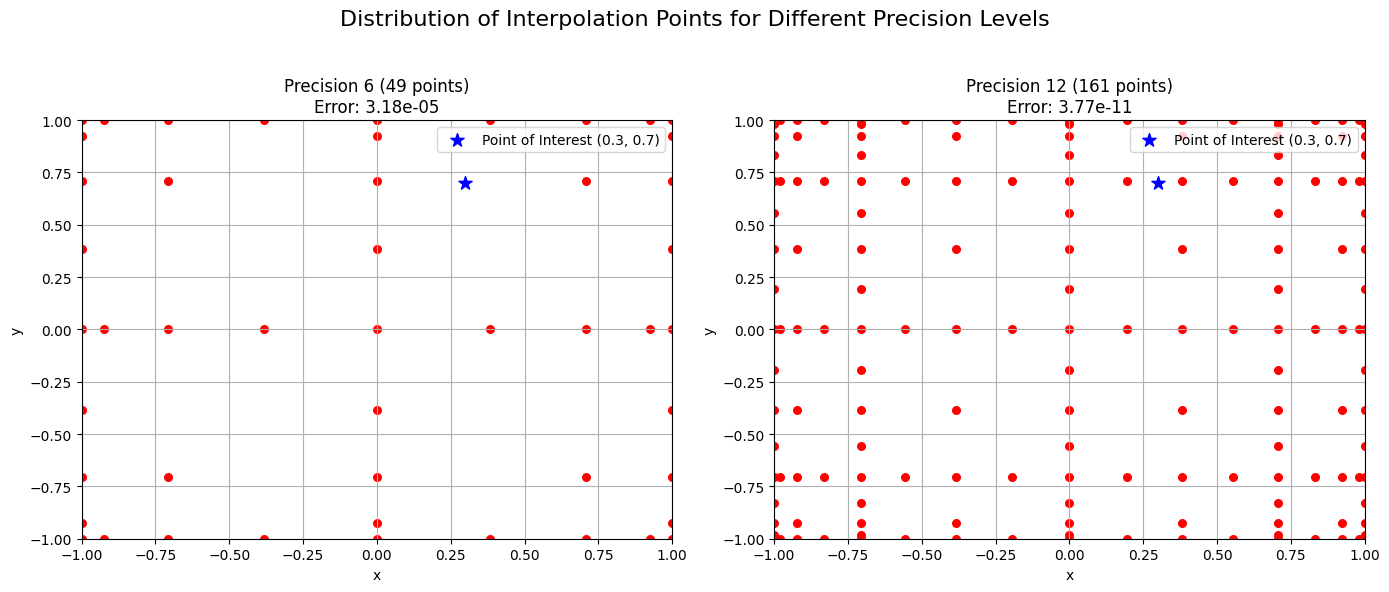

TypeError: Axes.scatter() got multiple values for argument 's'

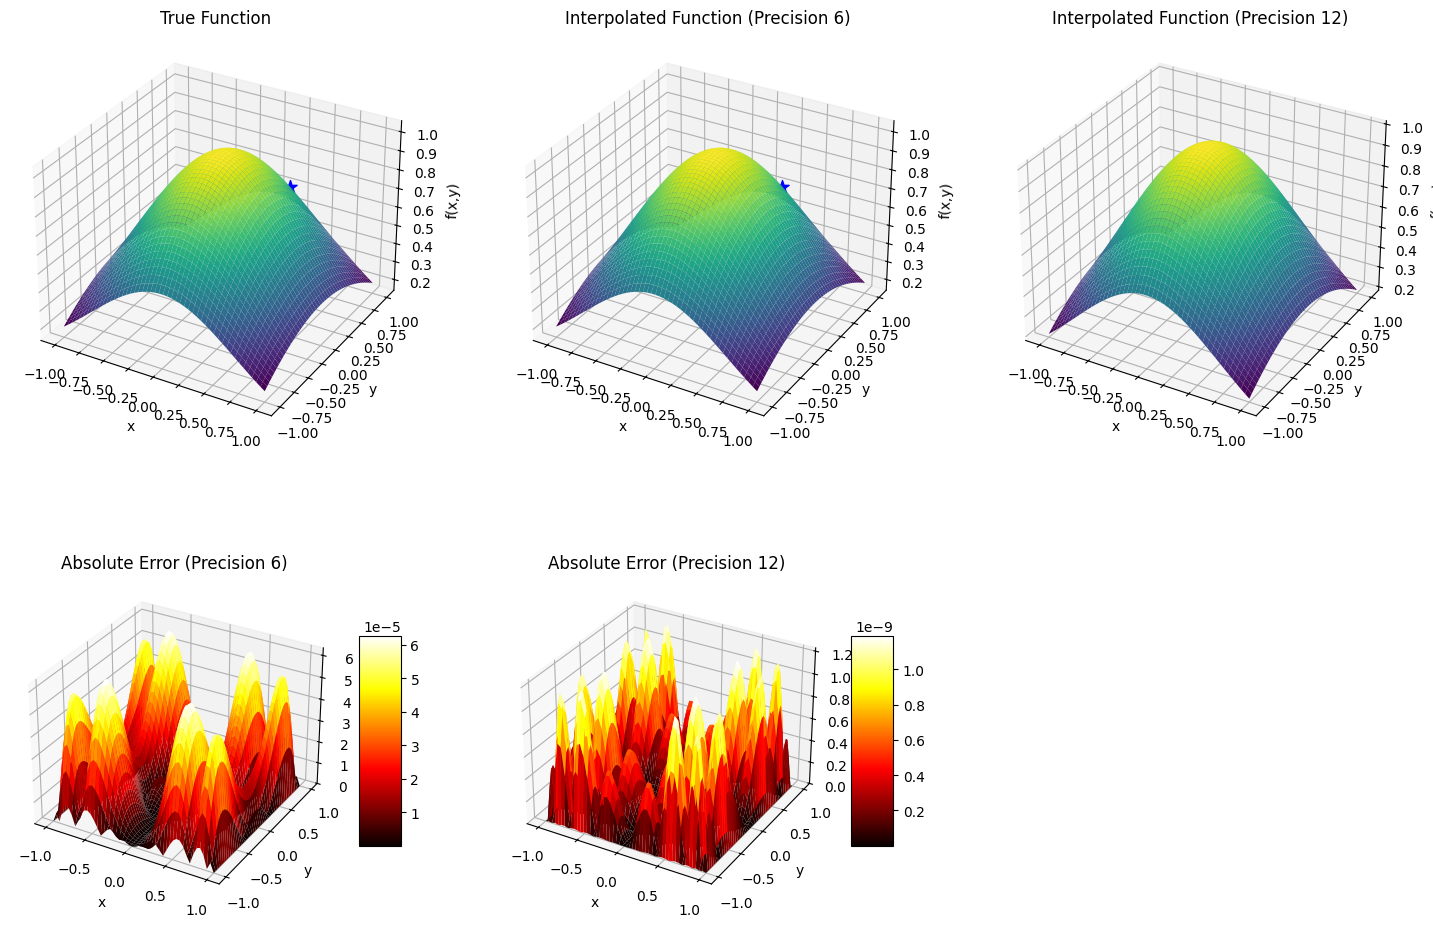

In [11]:
import numpy as np
import Tasmanian
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def example_04():
    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 4: interpolate f(x,y) = exp(-x^2) * cos(y), using clenshaw-curtis iptotal rule")
    
    # Function definition
    def f(x, y):
        return np.exp(-x**2) * np.cos(y)
    
    # Create a visualization of the true function
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # Plot the true function
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title('True Function: f(x,y) = exp(-x²) * cos(y)')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    plt.tight_layout()
    plt.show()
    
    # Original code for interpolation
    iNumInputs = 2
    iNumOutputs = 1
    aPointOfInterest = np.array([0.3, 0.7])
    aReferenceSolution = np.exp(-aPointOfInterest[0]**2) * np.cos(aPointOfInterest[1])
    
    # Store results for comparison
    precision_levels = [6, 12]
    grids = []
    errors = []
    
    for prec in precision_levels:
        grid = Tasmanian.makeGlobalGrid(iNumInputs, iNumOutputs, prec,
                                        "iptotal", "clenshaw-curtis")
        aPoints = grid.getNeededPoints()
        aModelValues = np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1])
        grid.loadNeededValues(aModelValues.reshape((aModelValues.shape[0], iNumOutputs)))
        # when using multiple points at once, evaluateBatch() is more efficient
        aResult = grid.evaluate(aPointOfInterest)
        fError = np.abs(aResult[0] - aReferenceSolution)
        
        # Store grid for later visualization
        grids.append(grid)
        errors.append(fError)
        
        print("\n    using total degree polynomials: {0:>2d}th degree".format(prec))
        print("                      the grid has: {0:1d} points".format(grid.getNumPoints()))
        print("          interpolant at (0.3,0.7): {0:1.5e}".format(aResult[0]))
        print("                             error: {0:1.5e}".format(fError))
    
    # Visualize the interpolation points for both precision levels
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Distribution of Interpolation Points for Different Precision Levels', fontsize=16)
    
    for i, (prec, grid) in enumerate(zip(precision_levels, grids)):
        points = grid.getPoints()
        
        # Plot the points
        axes[i].scatter(points[:, 0], points[:, 1], color='red', s=30)
        
        # Mark the point of interest
        axes[i].scatter([aPointOfInterest[0]], [aPointOfInterest[1]], color='blue', s=100, marker='*',
                      label='Point of Interest (0.3, 0.7)')
        
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('y')
        axes[i].set_xlim(-1, 1)
        axes[i].set_ylim(-1, 1)
        axes[i].set_title(f'Precision {prec} ({grid.getNumPoints()} points)\nError: {errors[i]:.2e}')
        axes[i].grid(True)
        axes[i].legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Visualize the interpolated function vs. the true function
    # We'll create a grid of evaluation points
    x_eval = np.linspace(-1, 1, 50)
    y_eval = np.linspace(-1, 1, 50)
    X_eval, Y_eval = np.meshgrid(x_eval, y_eval)
    Z_true = f(X_eval, Y_eval)
    
    # Create a figure with multiple plots for comparison
    fig = plt.figure(figsize=(18, 12))
    
    # Plot the true function
    ax1 = fig.add_subplot(2, 3, 1, projection='3d')
    surf1 = ax1.plot_surface(X_eval, Y_eval, Z_true, cmap=cm.viridis, linewidth=0, antialiased=True)
    ax1.set_title('True Function')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x,y)')
    
    # Evaluate the interpolants on the evaluation grid for both precision levels
    for i, (prec, grid) in enumerate(zip(precision_levels, grids)):
        Z_interp = np.zeros(X_eval.shape)
        
        # Evaluate the interpolant at each point
        for ix in range(X_eval.shape[0]):
            for iy in range(X_eval.shape[1]):
                point = np.array([X_eval[ix, iy], Y_eval[ix, iy]])
                Z_interp[ix, iy] = grid.evaluate(point)[0]
        
        # Calculate the error
        Z_error = np.abs(Z_interp - Z_true)
        
        # Plot the interpolated function
        ax = fig.add_subplot(2, 3, i+2, projection='3d')
        surf = ax.plot_surface(X_eval, Y_eval, Z_interp, cmap=cm.viridis, linewidth=0, antialiased=True)
        ax.set_title(f'Interpolated Function (Precision {prec})')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('f(x,y)')
        
        # Plot the error
        ax_err = fig.add_subplot(2, 3, i+4, projection='3d')
        surf_err = ax_err.plot_surface(X_eval, Y_eval, Z_error, cmap=cm.hot, linewidth=0, antialiased=True)
        fig.colorbar(surf_err, ax=ax_err, shrink=0.5, aspect=5)
        ax_err.set_title(f'Absolute Error (Precision {prec})')
        ax_err.set_xlabel('x')
        ax_err.set_ylabel('y')
        ax_err.set_zlabel('Error')
        # Set zlim for better visibility of errors
        max_err = np.max(Z_error)
        ax_err.set_zlim(0, max_err)
    
    # Add the point of interest to all plots
    for ax in fig.get_axes():
        if hasattr(ax, 'scatter'):
            ax.scatter([aPointOfInterest[0]], [aPointOfInterest[1]], 
                      [f(aPointOfInterest[0], aPointOfInterest[1])], 
                      color='blue', s=100, marker='*')
    
    plt.tight_layout()
    plt.show()
    
    # Create a 2D visualization of the error across the domain
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Interpolation Error Across the Domain', fontsize=16)
    
    for i, (prec, grid) in enumerate(zip(precision_levels, grids)):
        Z_interp = np.zeros(X_eval.shape)
        
        # Evaluate the interpolant at each point
        for ix in range(X_eval.shape[0]):
            for iy in range(X_eval.shape[1]):
                point = np.array([X_eval[ix, iy], Y_eval[ix, iy]])
                Z_interp[ix, iy] = grid.evaluate(point)[0]
        
        # Calculate the error
        Z_error = np.abs(Z_interp - Z_true)
        
        # Create a 2D contour plot of the error
        contour = axes[i].contourf(X_eval, Y_eval, Z_error, 50, cmap='hot')
        axes[i].set_title(f'Error Contour (Precision {prec})')
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('y')
        fig.colorbar(contour, ax=axes[i])
        
        # Mark the point of interest
        axes[i].scatter([aPointOfInterest[0]], [aPointOfInterest[1]], color='blue', s=100, marker='*',
                      label='Point of Interest (0.3, 0.7)')
        
        # Add the interpolation points
        points = grid.getPoints()
        axes[i].scatter(points[:, 0], points[:, 1], color='black', s=10, alpha=0.5)
        
        axes[i].legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Create a plot showing error convergence at the point of interest
    additional_precs = list(range(2, 16, 2))
    poi_errors = []
    num_points = []
    
    for prec in additional_precs:
        grid = Tasmanian.makeGlobalGrid(iNumInputs, iNumOutputs, prec, "iptotal", "clenshaw-curtis")
        aPoints = grid.getNeededPoints()
        aModelValues = np.exp(-aPoints[:,0]**2) * np.cos(aPoints[:,1])
        grid.loadNeededValues(aModelValues.reshape((aModelValues.shape[0], iNumOutputs)))
        aResult = grid.evaluate(aPointOfInterest)
        fError = np.abs(aResult[0] - aReferenceSolution)
        
        poi_errors.append(fError)
        num_points.append(grid.getNumPoints())
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot error vs precision
    ax1.semilogy(additional_precs, poi_errors, 'o-', color='blue')
    ax1.set_xlabel('Precision')
    ax1.set_ylabel('Absolute Error at (0.3, 0.7)')
    ax1.set_title('Error Convergence with Increasing Precision')
    ax1.grid(True)
    
    # Plot error vs number of points
    ax2.loglog(num_points, poi_errors, 'o-', color='red')
    ax2.set_xlabel('Number of Points')
    ax2.set_ylabel('Absolute Error at (0.3, 0.7)')
    ax2.set_title('Error Convergence with Number of Points')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

if (__name__ == "__main__"):
    example_04()

## 5. Interpolate $f(x,y) = exp(-x^2) \cdot cos(y)$, using leja rule

In [10]:
import numpy as np
import Tasmanian

def example_05():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 5: interpolate f(x,y) = exp(-x^2) * cos(y), using leja rule")
    print("           employ adaptive refinement to increase accuracy per samples")

    iNumInputs = 2
    iNumOutputs = 1
    def model(aX):
        return np.ones((1,)) * np.exp(-aX[0] * aX[0]) * np.cos(aX[1])

    iTestGridSize = 33
    dx = np.linspace(-1.0, 1.0, iTestGridSize) # sample on a uniform grid
    aMeshX, aMeshY = np.meshgrid(dx, dx)
    aTestPoints = np.column_stack([aMeshX.reshape((iTestGridSize**2, 1)),
                                   aMeshY.reshape((iTestGridSize**2, 1))])
    aReferenceValues = np.exp(-aTestPoints[:,0]**2) * np.cos(aTestPoints[:,1])
    aReferenceValues = aReferenceValues.reshape((aReferenceValues.shape[0], 1))

    def testGrid(grid, aTestPoints, aReferenceValues):
        aResult = grid.evaluateBatch(aTestPoints)
        for i in range(20):
            aX = aTestPoints[i,:]
        return np.max(np.abs(aResult - aReferenceValues))


    iInitialLevel = 5

    grid_isotropic = Tasmanian.SparseGrid()
    grid_iptotal   = Tasmanian.SparseGrid()
    grid_icurved   = Tasmanian.SparseGrid()
    grid_surplus   = Tasmanian.SparseGrid()
    grid_isotropic.makeGlobalGrid(iNumInputs, iNumOutputs, iInitialLevel, "level", "leja")
    grid_iptotal.copyGrid(grid_isotropic)
    grid_icurved.copyGrid(grid_isotropic)
    grid_surplus.copyGrid(grid_isotropic)

    iNumThreads = 1
    iBudget = 100
    print("{0:>22s}{1:>22s}{2:>22s}{3:>22s}".format("isotropic", "iptotal", "ipcurved", "surplus"))
    print("{0:>8s}{1:>14s}{0:>8s}{1:>14s}{0:>8s}{1:>14s}{0:>8s}{1:>14s}".format("points", "error"))

    bBelowBudget = True
    while(bBelowBudget):
        sInfo = ""
        if (grid_isotropic.getNumLoaded() < iBudget):
            Tasmanian.loadNeededValues(lambda x, tid : model(x), grid_isotropic, iNumThreads)
            sInfo += "{0:>8d}{1:>14s}".format(grid_isotropic.getNumLoaded(),
                     "{0:1.4e}".format(testGrid(grid_isotropic, aTestPoints, aReferenceValues)))

            iLevel = 0
            while(grid_isotropic.getNumNeeded() == 0):
                grid_isotropic.updateGlobalGrid(iLevel, "level")
                iLevel += 1
        else:
            sInfo += "{0:>22s}".format("")

        if (grid_iptotal.getNumLoaded() < iBudget):
            Tasmanian.loadNeededValues(lambda x, tid : model(x), grid_iptotal, iNumThreads)
            sInfo += "{0:>8d}{1:>14s}".format(grid_iptotal.getNumLoaded(),
                     "{0:1.4e}".format(testGrid(grid_iptotal, aTestPoints, aReferenceValues)))

            grid_iptotal.setAnisotropicRefinement("iptotal", 10, 0);
        else:
            sInfo += "{0:>22s}".format("")

        if (grid_icurved.getNumLoaded() < iBudget):
            Tasmanian.loadNeededValues(lambda x, tid : model(x), grid_icurved, iNumThreads)
            sInfo += "{0:>8d}{1:>14s}".format(grid_icurved.getNumLoaded(),
                     "{0:1.4e}".format(testGrid(grid_icurved, aTestPoints, aReferenceValues)))

            grid_icurved.setAnisotropicRefinement("ipcurved", 10, 0);
        else:
            sInfo += "{0:>22s}".format("")

        if (grid_surplus.getNumLoaded() < iBudget):
            Tasmanian.loadNeededValues(lambda x, tid : model(x), grid_surplus, iNumThreads)
            sInfo += "{0:>8d}{1:>14s}".format(grid_surplus.getNumLoaded(),
                     "{0:1.4e}".format(testGrid(grid_surplus, aTestPoints, aReferenceValues)))

            grid_surplus.setSurplusRefinement(1.E-8, 0)
        else:
            sInfo += "{0:>22s}".format("")

        print(sInfo)
        bBelowBudget = (grid_isotropic.getNumLoaded() < iBudget
                       or grid_icurved.getNumLoaded() < iBudget
                       or grid_icurved.getNumLoaded() < iBudget
                       or grid_surplus.getNumLoaded() < iBudget)


if (__name__ == "__main__"):
    example_05()


---------------------------------------------------------------------------------------------------

Example 5: interpolate f(x,y) = exp(-x^2) * cos(y), using leja rule
           employ adaptive refinement to increase accuracy per samples
             isotropic               iptotal              ipcurved               surplus
  points         error  points         error  points         error  points         error
      21    1.3718e-01      21    1.3718e-01      21    1.3718e-01      21    1.3718e-01
      28    6.8158e-03      31    2.3079e-02      34    2.7135e-03      28    6.8158e-03
      36    1.0104e-02      46    6.9494e-04      53    4.9009e-05      36    1.0104e-02
      45    5.7949e-04      63    4.3688e-05      69    2.4050e-06      45    5.7949e-04
      55    6.9575e-04      80    1.7683e-06      86    9.0510e-07      55    6.9575e-04
      66    3.4874e-05      93    7.8771e-07      96    1.1459e-07      65    3.4874e-05
      78    3.9636e-05     108    1.1444e-07   

## 6. Interpolate $f(x,y) = exp(-5 \cdot x^2) \cdot cos(z)$, using the rleja rule

In [11]:
import numpy as np
import Tasmanian

def example_06():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 6: interpolate f(x,y) = exp(-5 * x^2) * cos(z), using the rleja rule")
    print("           employs adaptive construction\n")

    iNumInputs = 2
    iNumOutputs = 1
    iNumSamplesPerBatch = 1 # the model is set for a single sample per-batch
    def model(aX):
        # note that the model has to return a 2-D numpy.ndarray
        return np.ones((1,1)) * np.exp(-5.0 * aX[0, 0] ** 2.0) * np.cos(aX[0, 1])

    iTestGridSize = 33
    dx = np.linspace(-1.0, 1.0, iTestGridSize) # sample on a uniform grid
    aMeshX, aMeshY = np.meshgrid(dx, dx)
    aTestPoints = np.column_stack([aMeshX.reshape((iTestGridSize**2, 1)),
                                   aMeshY.reshape((iTestGridSize**2, 1))])
    aReferenceValues = np.exp(-5.0 * aTestPoints[:,0]**2) * np.cos(aTestPoints[:,1])
    aReferenceValues = aReferenceValues.reshape((aReferenceValues.shape[0], 1))

    def testGrid(grid, aTestPoints, aReferenceValues):
        aResult = grid.evaluateBatch(aTestPoints)
        for i in range(20):
            aX = aTestPoints[i,:]
        return np.max(np.abs(aResult - aReferenceValues))

    grid = Tasmanian.SparseGrid()
    grid.makeSequenceGrid(iNumInputs, iNumOutputs, 2, "level", "rleja")

    iNumThreads = 1

    print("{0:>8s}{1:>14s}".format("points", "error"))
    for i in range(4):
        iBudget = 50 * (i + 1)

        Tasmanian.constructAnisotropicSurrogate(lambda x, tid : model(x),
                                                iBudget, iNumThreads, iNumSamplesPerBatch, grid,
                                                "iptotal", 0)

        print("{0:>8d}{1:>14s}".format(grid.getNumPoints(),
              "{0:1.4e}".format(testGrid(grid, aTestPoints, aReferenceValues))))


if (__name__ == "__main__"):
    example_06()


---------------------------------------------------------------------------------------------------

Example 6: interpolate f(x,y) = exp(-5 * x^2) * cos(z), using the rleja rule
           employs adaptive construction

  points         error
      50    8.3551e-02
     100    1.9930e-04
     150    9.2996e-06
     200    5.2601e-08


## 8. Interpolate different functions demonstrating the different local polynomial rules

In [12]:
import numpy as np
import Tasmanian

def example_08():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 8: interpolate different functions demonstrating the different")
    print("           local polynomial rules\n")

    iNumInputs = 2 # using two inputs for testing

    # test the error on a uniform dense grid with 10K points
    iTestGridSize = 100
    dx = np.linspace(-1.0, 1.0, iTestGridSize) # sample on a uniform grid
    aMeshX, aMeshY = np.meshgrid(dx, dx)
    aTestPoints = np.column_stack([aMeshX.reshape((iTestGridSize**2, 1)),
                                   aMeshY.reshape((iTestGridSize**2, 1))])

    def get_error(grid, model, aTestPoints):
        aGridResult = grid.evaluateBatch(aTestPoints)
        aModelResult = np.empty((aTestPoints.shape[0], 1), np.float64)
        for i in range(aTestPoints.shape[0]):
            aModelResult[i,:] = model(aTestPoints[i,:])
        return np.max(np.abs(aModelResult[:,0] - aGridResult[:,0]))

    def smooth_model(aX):
        return np.ones((1,)) * np.exp(-aX[0]**2) * np.cos(aX[1])

    iOrder = 2
    grid_localp     = Tasmanian.makeLocalPolynomialGrid(iNumInputs, 1, 7, iOrder, "localp")
    grid_semilocalp = Tasmanian.makeLocalPolynomialGrid(iNumInputs, 1, 7, iOrder, "semi-localp")

    Tasmanian.loadNeededValues(lambda x, tid : smooth_model(x), grid_localp, 4)
    Tasmanian.loadNeededValues(lambda x, tid : smooth_model(x), grid_semilocalp, 4)

    print("Using smooth model: f(x, y) = exp(-x*x) * cos(y)")
    print(" rule_localp,     points = {0:1d}   error = {1:1.4e}".format(
        grid_localp.getNumPoints(), get_error(grid_localp, smooth_model, aTestPoints)))
    print(" rule_semilocalp, points = {0:1d}   error = {1:1.4e}".format(
        grid_semilocalp.getNumPoints(), get_error(grid_semilocalp, smooth_model, aTestPoints)))
    print(" If the model is smooth, rule_semilocalp has an advantage.\n")

    def zero_model(aX):
        return np.ones((1,)) * np.cos(0.5 * np.pi * aX[0]) * np.cos(0.5 * np.pi * aX[1])

    grid_localp0 = Tasmanian.makeLocalPolynomialGrid(iNumInputs, 1, 6, iOrder, "localp-zero")

    Tasmanian.reloadLoadedPoints(lambda x, tid : zero_model(x), grid_localp, 4)
    Tasmanian.loadNeededValues(lambda x, tid : zero_model(x), grid_localp0, 4)

    print("Using homogeneous model: f(x, y) = cos(pi * x / 2) * cos(pi * y / 2)")
    print(" rule_localp,  points = {0:1d}   error = {1:1.4e}".format(
        grid_localp.getNumPoints(), get_error(grid_localp, zero_model, aTestPoints)))
    print(" rule_localp0, points = {0:1d}   error = {1:1.4e}".format(
        grid_localp0.getNumPoints(), get_error(grid_localp0, zero_model, aTestPoints)))
    print(" The rule_localp0 uses basis tuned for models with zero boundary.")


if (__name__ == "__main__"):
    example_08()


---------------------------------------------------------------------------------------------------

Example 8: interpolate different functions demonstrating the different
           local polynomial rules

Using smooth model: f(x, y) = exp(-x*x) * cos(y)
 rule_localp,     points = 705   error = 1.0486e-05
 rule_semilocalp, points = 705   error = 6.4003e-06
 If the model is smooth, rule_semilocalp has an advantage.

Using homogeneous model: f(x, y) = cos(pi * x / 2) * cos(pi * y / 2)
 rule_localp,  points = 705   error = 4.0768e-05
 rule_localp0, points = 769   error = 4.1694e-06
 The rule_localp0 uses basis tuned for models with zero boundary.


## 9. Comparison between local polynomial refinement strategies

In [13]:
import numpy as np
import Tasmanian

def example_09():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 9: comparison between local polynomial refinement strategies\n")

    iNumInputs = 2 # using two inputs for testing

    # test the error on a uniform dense grid with 10K points
    iTestGridSize = 100
    dx = np.linspace(-1.0, 1.0, iTestGridSize) # sample on a uniform grid
    aMeshX, aMeshY = np.meshgrid(dx, dx)
    aTestPoints = np.column_stack([aMeshX.reshape((iTestGridSize**2, 1)),
                                   aMeshY.reshape((iTestGridSize**2, 1))])

    def get_error(grid, model, aTestPoints):
        aGridResult = grid.evaluateBatch(aTestPoints)
        aModelResult = np.empty((aTestPoints.shape[0], 1), np.float64)
        for i in range(aTestPoints.shape[0]):
            aModelResult[i,:] = model(aTestPoints[i,:])
        return np.max(np.abs(aModelResult[:,0] - aGridResult[:,0]))

    def sharp_model(aX):
        return np.ones((1,)) * np.exp(-aX[0]) / (1.0 + 100.0 * np.exp(-10.0 * aX[1]))

    grid_classic = Tasmanian.makeLocalPolynomialGrid(iNumInputs, 1, 2,
                                                     iOrder = -1, sRule = "localp")
    grid_fds = Tasmanian.copyGrid(grid_classic)

    print("Using batch refinement:")
    print("               classic                  fds")
    print("  points         error  points        error")

    fTolerance = 1.E-5;
    while((grid_classic.getNumNeeded() > 0) or (grid_fds.getNumNeeded() > 0)):
        Tasmanian.loadNeededValues(lambda x, tid: sharp_model(x), grid_classic, 4);
        Tasmanian.loadNeededValues(lambda x, tid: sharp_model(x), grid_fds, 4);

        # print the results at this stage
        print("{0:>8d}{1:>14.4e}{2:>8d}{3:>14.4e}".format(
            grid_classic.getNumLoaded(), get_error(grid_classic, sharp_model, aTestPoints),
            grid_fds.getNumLoaded(), get_error(grid_fds, sharp_model, aTestPoints)))

        # setting refinement for each grid
        grid_classic.setSurplusRefinement(fTolerance, 0, "classic");
        grid_fds.setSurplusRefinement(fTolerance, 0, "fds");

    # reset the grid and repeat using construction
    grid_classic = Tasmanian.makeLocalPolynomialGrid(iNumInputs, 1, 2,
                                                     iOrder = -1, sRule = "localp")
    grid_fds.copyGrid(grid_classic)

    print("\nUsing construction:")
    print("               classic                  fds")
    print("  points         error  points        error")

    iNumThreads = 1
    for budget in range(50, 800, 100):
        Tasmanian.constructSurplusSurrogate(
            lambda x, tid : sharp_model(x.reshape((2,))).reshape((1,1)),
            budget, iNumThreads, 1, grid_classic, fTolerance, "classic")
        Tasmanian.constructSurplusSurrogate(
            lambda x, tid : sharp_model(x.reshape((2,))).reshape((1,1)),
            budget, iNumThreads, 1, grid_fds, fTolerance, "fds")

        print("{0:>8d}{1:>14.4e}{2:>8d}{3:>14.4e}".format(
            grid_classic.getNumLoaded(), get_error(grid_classic, sharp_model, aTestPoints),
            grid_fds.getNumLoaded(), get_error(grid_fds, sharp_model, aTestPoints)))


if (__name__ == "__main__"):
    example_09()


---------------------------------------------------------------------------------------------------

Example 9: comparison between local polynomial refinement strategies

Using batch refinement:
               classic                  fds
  points         error  points        error
      13    5.1490e-01      13    5.1490e-01
      29    3.9641e-01      29    3.9641e-01
      65    9.0101e-02      65    9.0101e-02
     129    1.2559e-02     121    1.2559e-02
     245    1.4269e-03     231    1.4269e-03
     401    1.7079e-04     377    1.7079e-04
     581    9.2202e-06     549    9.2202e-06
     681    4.3843e-06     649    6.4505e-06

Using construction:
               classic                  fds
  points         error  points        error
      50    1.8312e-02      50    2.7879e-02
     150    1.8609e-03     150    2.3951e-03
     250    3.0466e-04     250    3.1400e-04
     350    4.9782e-05     350    5.0446e-05
     450    1.9537e-05     450    1.8629e-05
     550    1.8409e-05

## 10. Comparison between local polynomial and wavelet grids

In [14]:
import numpy as np
import Tasmanian

def example_10():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 10: comparison between local polynomial and wavelet grids\n")

    iNumInputs = 2 # using two inputs for testing

    # test the error on a uniform dense grid with 10K points
    iTestGridSize = 100
    dx = np.linspace(-1.0, 1.0, iTestGridSize) # sample on a uniform grid
    aMeshX, aMeshY = np.meshgrid(dx, dx)
    aTestPoints = np.column_stack([aMeshX.reshape((iTestGridSize**2, 1)),
                                   aMeshY.reshape((iTestGridSize**2, 1))])

    def get_error(grid, model, aTestPoints):
        aGridResult = grid.evaluateBatch(aTestPoints)
        aModelResult = np.empty((aTestPoints.shape[0], 1), np.float64)
        for i in range(aTestPoints.shape[0]):
            aModelResult[i,:] = model(aTestPoints[i,:])
        return np.max(np.abs(aModelResult[:,0] - aGridResult[:,0]))

    def sharp_model(aX):
        return np.ones((1,)) * aX[0] / (1.0 + 100.0 * np.exp(-10.0 * aX[1]))

    grid_poly = Tasmanian.makeLocalPolynomialGrid(iNumInputs, 1, 3,
                                                     iOrder = 1, sRule = "localp")
    grid_wavelet = Tasmanian.makeWaveletGrid(iNumInputs, 1, 1, 1)

    print("            polynomial              wavelet")
    print("  points         error  points        error")

    fTolerance = 1.E-5;
    while((grid_poly.getNumNeeded() > 0) or (grid_wavelet.getNumNeeded() > 0)):
        Tasmanian.loadNeededValues(lambda x, tid: sharp_model(x), grid_poly, 4);
        Tasmanian.loadNeededValues(lambda x, tid: sharp_model(x), grid_wavelet, 4);

        # print the results at this stage
        print("{0:>8d}{1:>14.4e}{2:>8d}{3:>14.4e}".format(
            grid_poly.getNumLoaded(), get_error(grid_poly, sharp_model, aTestPoints),
            grid_wavelet.getNumLoaded(), get_error(grid_wavelet, sharp_model, aTestPoints)))

        # setting refinement for each grid
        grid_poly.setSurplusRefinement(fTolerance, 0, "fds");
        grid_wavelet.setSurplusRefinement(fTolerance, 0, "fds");


if (__name__ == "__main__"):
    example_10()


---------------------------------------------------------------------------------------------------

Example 10: comparison between local polynomial and wavelet grids

            polynomial              wavelet
  points         error  points        error
      29    1.9775e-01      21    1.9775e-01
      41    6.5704e-02      33    6.5704e-02
      63    1.8074e-02      55    1.8074e-02
      98    4.6367e-03      97    4.6367e-03
     172    1.1315e-03     169    1.1315e-03
     306    2.8060e-04     301    2.8060e-04
     550    6.9363e-05     541    6.9363e-05
     980    1.8025e-05     961    1.8025e-05
    1660    4.4576e-06    1609    4.4576e-06
    2451    2.4461e-06    2299    2.3522e-06
    2681    2.4461e-06    2299    2.3522e-06


## 11.  Using unstructured data (won't work without GPU!)

In [ ]:
import numpy as np
from random import uniform
import Tasmanian

def example_11():

    print("\n---------------------------------------------------------------------------------------------------\n")
    print("Example 11: Using unstructured data\n")

    iNumInputs = 2 # using two inputs for testing

    # test the error on a uniform dense grid with 10K points
    iTestGridSize = 100
    dx = np.linspace(-1.0, 1.0, iTestGridSize) # sample on a uniform grid
    aMeshX, aMeshY = np.meshgrid(dx, dx)
    aTestPoints = np.column_stack([aMeshX.reshape((iTestGridSize**2, 1)),
                                   aMeshY.reshape((iTestGridSize**2, 1))])

    def get_error(grid, model, aTestPoints):
        aGridResult = grid.evaluateBatch(aTestPoints)
        aModelResult = np.empty((aTestPoints.shape[0], 1), np.float64)
        for i in range(aTestPoints.shape[0]):
            aModelResult[i,:] = model(aTestPoints[i,:])
        return np.max(np.abs(aModelResult[:,0] - aGridResult[:,0]))

    def model(aX):
        return np.ones((1,)) * np.exp( - aX[0]**2 - aX[1]**2 )

    grid = Tasmanian.makeGlobalGrid(iNumInputs, 1, 4, "level", "clenshaw-curtis")

    # generate random data
    iNumData = 2000
    inputs = np.zeros((iNumData, iNumInputs))
    outputs = np.zeros((iNumData, 1))

    for i in range(iNumData):
        inputs[i,0] = uniform(-1.0, 1.0)
        inputs[i,1] = uniform(-1.0, 1.0)
        outputs[i,:] = model(inputs[i,:])

    if (not grid.isAccelerationAvailable("cpu-blas") and
        not grid.isAccelerationAvailable("gpu-cuda") and
        not grid.isAccelerationAvailable("gpu-magma")):
        print("Skipping example 11, BLAS, CUDA, or MAGMA acceleration required.")
        return

    Tasmanian.loadUnstructuredDataL2(inputs, outputs, 1.E-4, grid)

    print("Using construction from unstructured (random) data")
    print("    approximatino error = {0:1.6E}".format(get_error(grid, model, aTestPoints)))
    print("  note: compared to the C++ code, this example does not fix the random seed")
    print("        the error will be slightly different every time you run the example")
    print("")


if (__name__ == "__main__"):
    example_11()